### Задание 
 Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
На каких платформах произошло больше всего релизов?
Игры каких издателей (Publisher) встречаются в датасете чаще всего?
В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports? 
 
 Имеются следующие поля:

 - Rank – место по объему продаж
 - Name – название игры
 - Platform – платформа, на которой выпущена игра
 - Year – год релиза
 - Genre – жанр
 - Publisher – издатель
 - NA_Sales – продажи в Северной Америке, в млн.
 - EU_Sales – продажи в Европе, в млн.
 - JP_Sales – продажи в Японии, в млн.
 - Other_Sales – продажи в остальном мире, в млн.
 - Global_Sales – продажи по всему миру, в млн.

In [1]:
#Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Считываем данные из .csv файла

df = pd.read_csv('games.csv')

In [128]:
# Проверяем информацию о ДФ

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [130]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [131]:
# Отбрасываем строки с NaN и обновляем индекс
df = df.dropna().reset_index()

**4) Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам**

In [16]:
# Смотрим описательную статистику колонки Year
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [17]:
# Находим моду
df['Year'].mode()

0    2009.0
Name: Year, dtype: float64

In [35]:
#Группируем и строим график

games_per_year = df.groupby('Year', as_index=False)\
  .agg(count = ('Genre','count'))

In [36]:
games_per_year['Year']=games_per_year.Year.astype(int)

In [160]:
# Настройка графиков по умолчанию
sns.set(
    font_scale =1.5,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,20)}
)

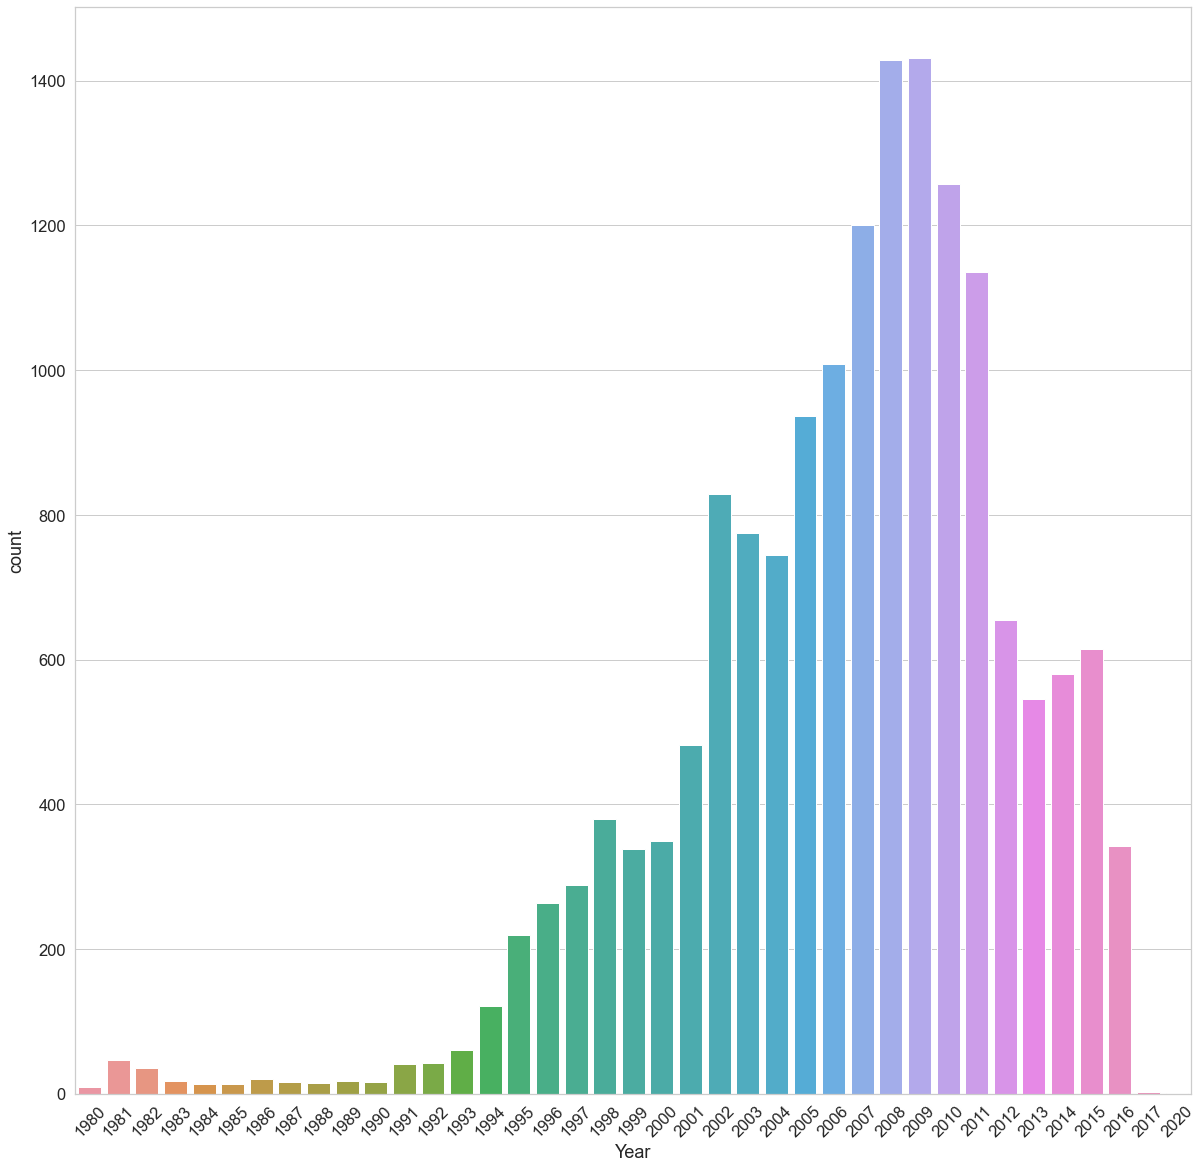

In [161]:
plt.xticks(rotation=45)
ax = sns.barplot(x='Year', y='count', data=games_per_year)

**5) На каких платформах произошло больше всего релизов?**

 **Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.**

In [64]:
# Способ №1
names_per_platform = df.groupby('Platform', as_index=False)\
                       .agg(release_count = ('Name','count'))\
                       .sort_values('release_count', ascending = False)

In [65]:
names_per_platform['release_sum'] = names_per_platform.release_count.sum()

In [69]:
names_per_platform['share_of_releases'] = names_per_platform['release_count'].div(names_per_platform['release_sum'])\
                                                                             .mul(100)\
                                                                             .round(2)

In [72]:
names_per_platform.query('share_of_releases > 7').Platform.tolist()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [143]:
# Способ №2
df.Platform\
  .value_counts(normalize = True)\
  .mul(100)\
  .reset_index()\
  .query('Platform > 7')

,index,Platform
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508


In [115]:
# Способ №3.1
df.value_counts('Platform', normalize = True)\
    .rename_axis('unique_values')\
    .reset_index(name='counts')\
    .query('counts > 0.07')\
    .unique_values.tolist()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [132]:
# Способ №3.2
df.value_counts('Platform', normalize = True)\
  .reset_index(name='counts')\
  .query('counts > 0.07')\
  .Platform\
  .tolist()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

 **NOTE: df.groupby('your_column_1')['your_column_2'].value_counts()   - interesting syntax for groupby and value_counts** 
    
      
   

**6) Игры каких издателей (Publisher) встречаются в датасете чаще всего?**

 **В качестве ответа укажите наибольшую абсолютную частоту встречаемости.**

In [136]:
df.Publisher\
  .value_counts()\
  .max()

1339

**7) Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).** 

 **В каком регионе медианное значение объема продаж является наибольшим?**
 
  **Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.**

In [148]:
df[['Publisher','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].query('Publisher == "Nintendo"')\
                                                                  .describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


**8) Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:**

 - **по оси x будет расположен жанр игры (Genre)**
 - **по оси у – объем продаж в Японии (JP_sales)**
 
   **Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?**

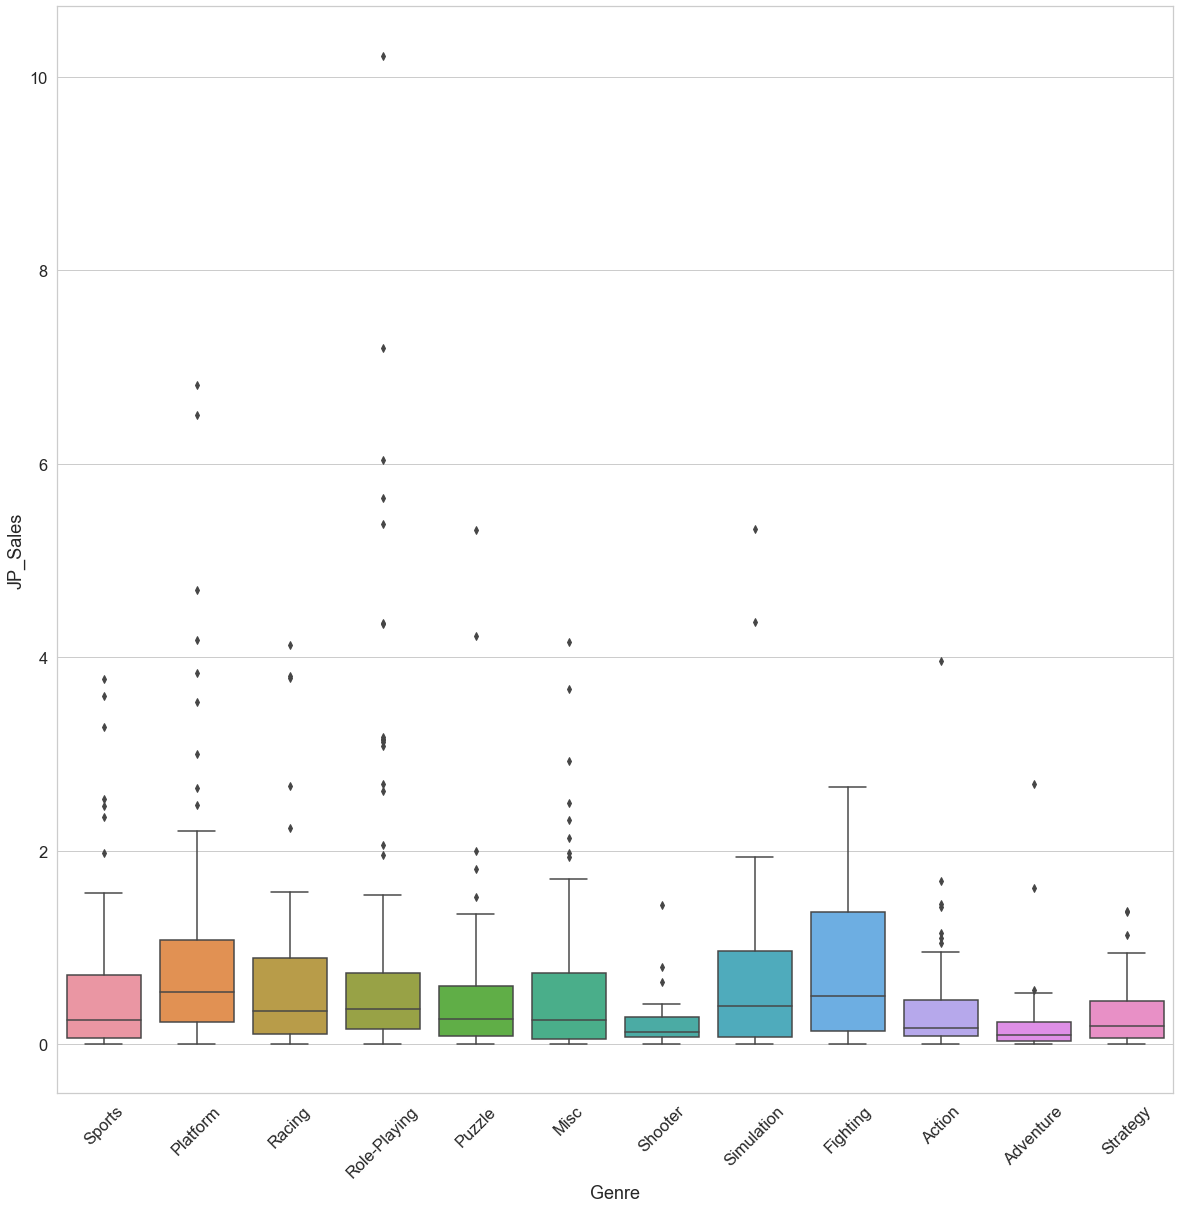

In [163]:
plt.xticks(rotation=45)
ax = sns.boxplot(x = 'Genre', y = 'JP_Sales', data = df.query('Publisher == "Nintendo"'))

**9) Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.**

 **На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.** 

In [165]:
nintendo_games = df.query('''Publisher == "Nintendo" and   (Genre == "Fighting" 
                                                         or Genre == "Simulation" 
                                                         or Genre == "Platform" 
                                                         or Genre == "Racing" 
                                                         or Genre == "Sports")''')\
                   .groupby(['Genre','Year'], as_index=False)\
                   .agg({'Global_Sales':'sum'})

In [167]:
# Настройка графика
sns.set(
    font_scale =1.5,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,10)}
)

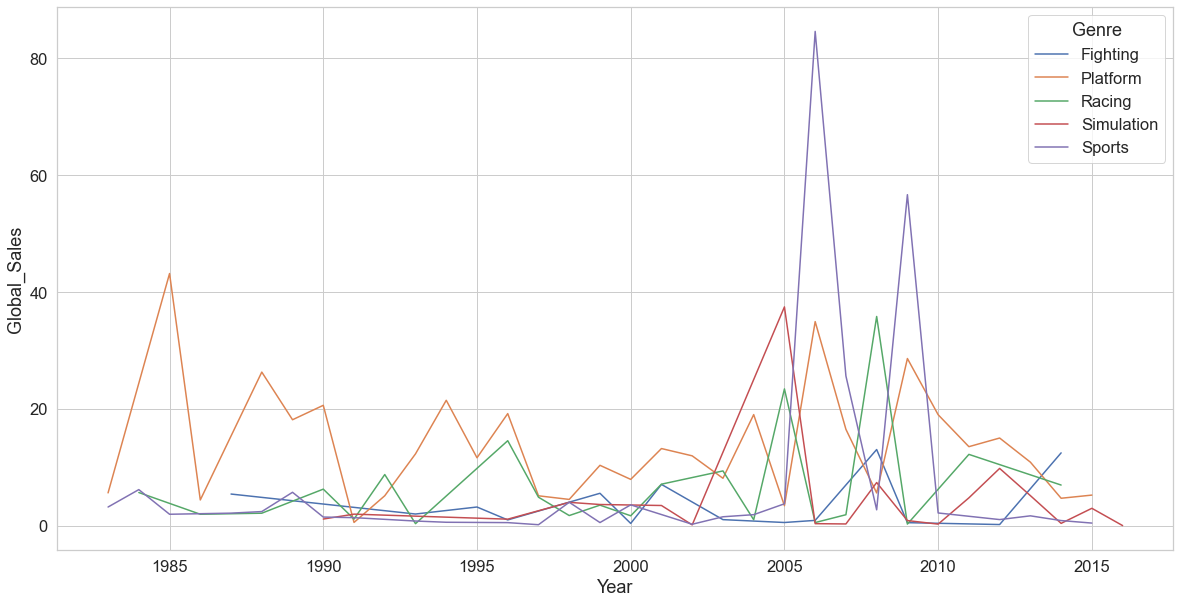

In [176]:
ax = sns.lineplot(data = nintendo_games, x = 'Year', y = 'Global_Sales', hue = 'Genre')